In [53]:
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    HistGradientBoostingClassifier,
)
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, XGBRFClassifier
from mlcomp.data.load import load_classification_train, load_classification_test
from mlcomp.data.preprocess import remove_outliers, drop_ft2
import pandas as pd
import matplotlib.pyplot as plt
import joblib



In [54]:

algos = [
    #AdaBoostClassifier,
    #BaggingClassifier,
    ExtraTreesClassifier,
    #GradientBoostingClassifier,
    #RandomForestClassifier,
    HistGradientBoostingClassifier,
    XGBClassifier,
    #XGBRFClassifier,
]



#X, y = load_classification_train(X_y_split=True)

df = load_classification_train()
df = drop_ft2(df)
df = remove_outliers(df, random_state=42)

X = df.drop(columns='label')

to_drop = {
    'ExtraTreesClassifier': ['feature_13', 'feature_14', 'feature_20', 'feature_21', 'feature_27'],
    'HistGradientBoostingClassifier': ['feature_3', 'feature_4', 'feature_22'],
    'XGBClassifier': ['feature_4', 'feature_16']
}

X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

y = df['label']

In [55]:
results = pd.DataFrame(columns=["model_name", "cv_result", "model"])

for index, alg in enumerate(algos):
    model = alg()
    model_name = model.__class__.__name__

    print(f"Fitting {model_name}...")

    X_dropped = X.drop(columns=to_drop[model_name])

    cv_res = cross_validate(model, X_dropped, y, cv=10, scoring="f1_macro")

    results.loc[index] = [model_name, cv_res, model]

Fitting ExtraTreesClassifier...
Fitting HistGradientBoostingClassifier...
Fitting XGBClassifier...


c:\Users\baumg\miniconda3\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\baumg\miniconda3\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\baumg\miniconda3\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\baumg\miniconda3\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\User

In [56]:
results['cv_mean'] = results['cv_result'].map(lambda x: x['test_score'].mean())

res_sort = results.sort_values('cv_mean', ascending=False)
res_sort


,model_name,cv_result,model,cv_mean
1,HistGradientBoostingClassifier,"{'fit_time': [0.7442312240600586, 0.7559990882...",HistGradientBoostingClassifier(),0.788001
0,ExtraTreesClassifier,"{'fit_time': [0.3570132255554199, 0.4158937931...",ExtraTreesClassifier(),0.761115
2,XGBClassifier,"{'fit_time': [0.16498994827270508, 0.211005210...","XGBClassifier(base_score=None, booster=None, c...",0.760194


In [57]:

#joblib.dump(results, 'sel_res_rm2_iso_f_rm_outlier_stdscale_perm_imp.joblib')
#joblib.dump(to_drop, 'to_drop_for_the_res.joblib')

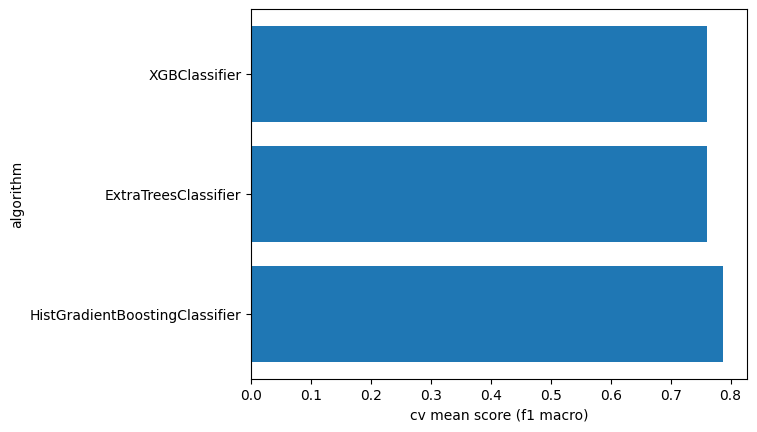

In [58]:
plt.barh(res_sort['model_name'], res_sort['cv_mean'])
plt.xlabel('cv mean score (f1 macro)')
plt.ylabel('algorithm')
plt.show()


In [59]:
results

,model_name,cv_result,model,cv_mean
0,ExtraTreesClassifier,"{'fit_time': [0.3570132255554199, 0.4158937931...",ExtraTreesClassifier(),0.761115
1,HistGradientBoostingClassifier,"{'fit_time': [0.7442312240600586, 0.7559990882...",HistGradientBoostingClassifier(),0.788001
2,XGBClassifier,"{'fit_time': [0.16498994827270508, 0.211005210...","XGBClassifier(base_score=None, booster=None, c...",0.760194
